# *Estudo da relação entre os hábitos e a performance acadêmica*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [5]:
df = pd.read_csv("C:\\Users\\vitor.guerra\\Desktop\\Analises Python\\Habitos e performance academica\\student_habits_performance.csv", sep = ",")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
df.shape

(1000, 16)

In [8]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [17]:
lista_colunas = ['id_aluno', 'idade', 'gênero', 'horas_de_estudo_por_dia', 'horas_de_redes_sociais', 'horas_de_netflix', 'trabalho_parcial', 'percentual_de_frequência', 'horas_de_sono', 'qualidade_da_dieta', 'frequência_de_exercício', 'nível_de_educação_dos_pais', 'qualidade_da_internet', 'avaliação_da_saúde_mental', 'participação_em_atividades_extras', 'nota_do_exame']

dicionario_colunas = dict(zip(df.columns, lista_colunas))

df_renomeado = df.rename(columns = dicionario_colunas)
df_renomeado.head()

,id_aluno,idade,gênero,horas_de_estudo_por_dia,horas_de_redes_sociais,horas_de_netflix,trabalho_parcial,percentual_de_frequência,horas_de_sono,qualidade_da_dieta,frequência_de_exercício,nível_de_educação_dos_pais,qualidade_da_internet,avaliação_da_saúde_mental,participação_em_atividades_extras,nota_do_exame
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [20]:
df_renomeado.describe()

,idade,horas_de_estudo_por_dia,horas_de_redes_sociais,horas_de_netflix,percentual_de_frequência,horas_de_sono,frequência_de_exercício,avaliação_da_saúde_mental,nota_do_exame
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Qual gênero tem maior quantidade média de horas de estudo por dia?"**

In [29]:
df_renomeado = df_renomeado.loc[df_renomeado["gênero"] != "Other"]

df_renomeado.groupby("gênero")[["horas_de_estudo_por_dia"]].mean()

,horas_de_estudo_por_dia
gênero,
Female,3.583784
Male,3.510692


**Qual idade tem maior média diária de estudo por dia?"**

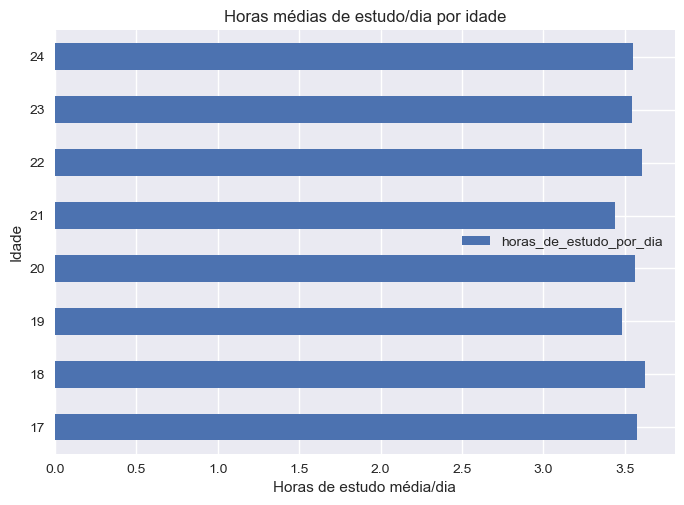

In [55]:
plt.style.use("seaborn-v0_8")

df_renomeado.groupby("idade")[["horas_de_estudo_por_dia"]].mean().plot.barh(title = "Horas médias de estudo/dia por idade")
plt.xlabel("Horas de estudo média/dia")
plt.ylabel("Idade")
plt.legend(loc = "best")


In [56]:
df_renomeado.groupby("idade")[["horas_de_estudo_por_dia"]].mean()

,horas_de_estudo_por_dia
idade,
17,3.572441
18,3.624779
19,3.483636
20,3.560432
21,3.436441
22,3.606306
23,3.540708
24,3.551969


**Qual gênero tem maior média na nota do exame?**

In [57]:
df_renomeado.groupby("gênero")[["nota_do_exame"]].mean()

,nota_do_exame
gênero,
Female,69.741372
Male,69.368344


***Correlação entre variáveis e nota no exame***

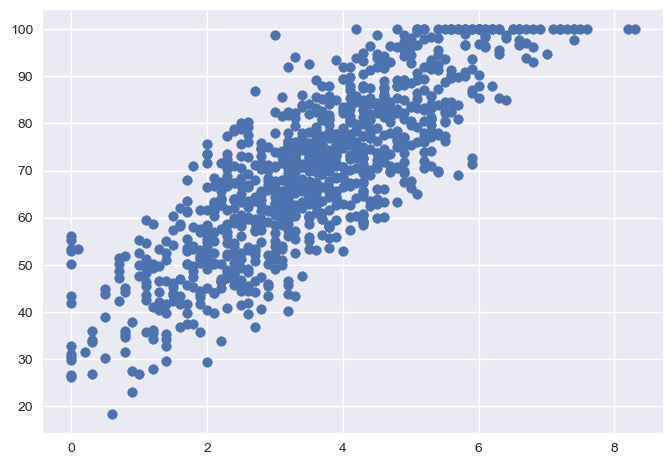

In [59]:
plt.scatter(x = df_renomeado["horas_de_estudo_por_dia"], y = df_renomeado["nota_do_exame"])

In [69]:
correlacao_estudo_nota = df_renomeado["horas_de_estudo_por_dia"].corr(df_renomeado["nota_do_exame"]) 
round(correlacao_estudo_nota, 2)

0.83

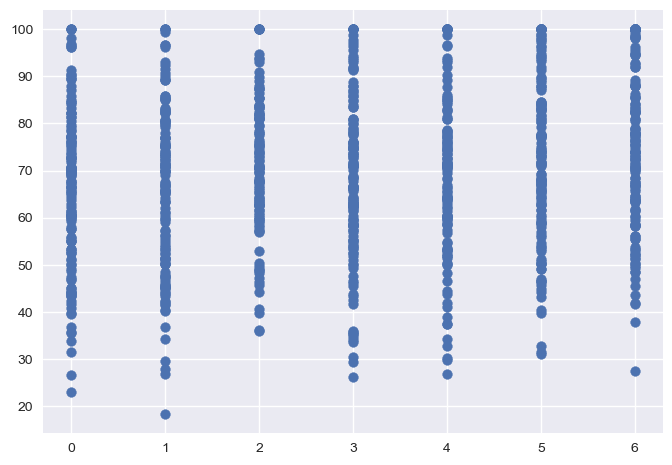

In [70]:
plt.scatter(x = df_renomeado["frequência_de_exercício"], y = df_renomeado["nota_do_exame"])

In [71]:
correlacao_estudo_nota = df_renomeado["frequência_de_exercício"].corr(df_renomeado["nota_do_exame"]) 
round(correlacao_estudo_nota, 2)

0.16

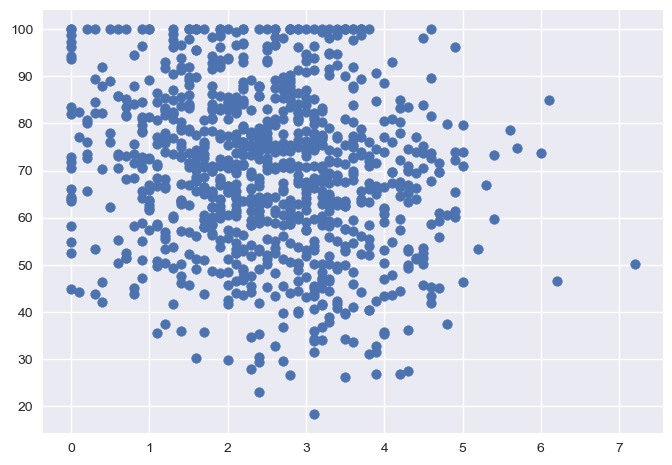

In [73]:
plt.scatter(x = df_renomeado["horas_de_redes_sociais"], y = df_renomeado["nota_do_exame"])

In [74]:
correlacao_rede_nota = df_renomeado["horas_de_redes_sociais"].corr(df_renomeado["nota_do_exame"]) 
round(correlacao_rede_nota, 2)

-0.16

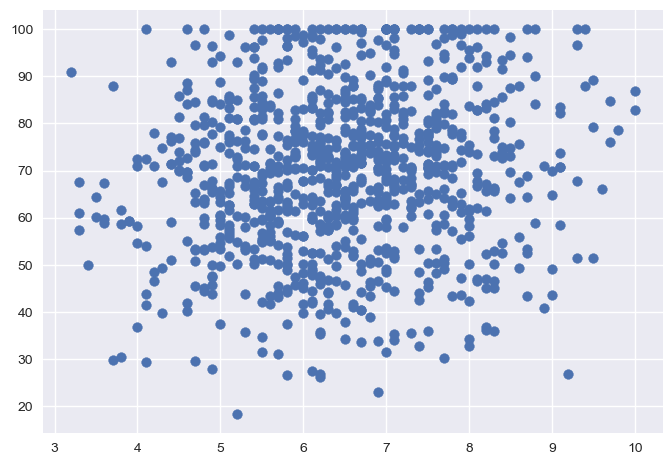

In [76]:
plt.scatter(x = df_renomeado["horas_de_sono"], y = df_renomeado["nota_do_exame"])

In [75]:
correlacao_sono_nota = df_renomeado["horas_de_sono"].corr(df_renomeado["nota_do_exame"]) 
round(correlacao_sono_nota, 2)

0.13

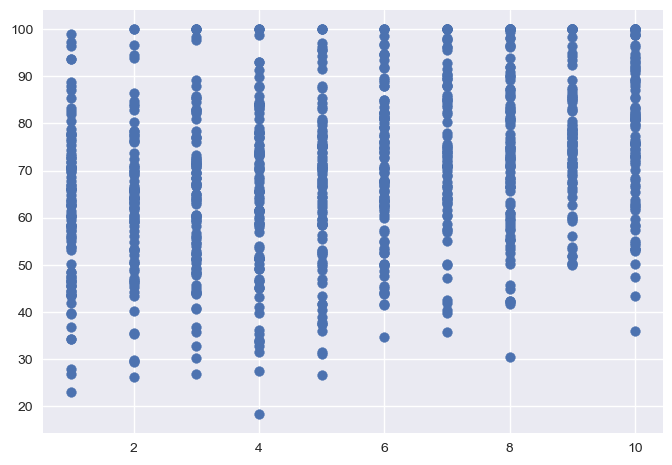

In [77]:
plt.scatter(x = df_renomeado["avaliação_da_saúde_mental"], y = df_renomeado["nota_do_exame"])

In [78]:
correlacao_mental_nota = df_renomeado["avaliação_da_saúde_mental"].corr(df_renomeado["nota_do_exame"]) 
round(correlacao_mental_nota, 2)

0.32

***Matriz de interpretação correlacional***



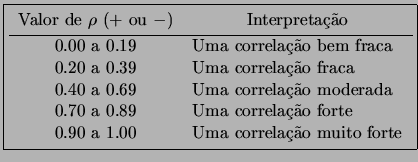